In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
url = "https://api.openweathermap.org/data/2.5/weather?appid=f97ac0f7302f7060c8536142e0c5be7b"

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

iqaluit ca
kralendijk an
albany au
mataura pf
sovetskiy ru
sentyabrskiy ru
rikitea pf
hobart au
rikitea pf
rikitea pf
atakpame tg
vao nc
nome us
kavaratti in
vaitupu wf
codrington ag
mataura pf
luderitz na
barrow us
torbay ca
wanning cn
carnarvon au
belushya guba ru
taolanaro mg
airai pw
pevek ru
visby se
clyde river ca
fort saint james ca
gilgit pk
atambua id
airai pw
cidreira br
zalesovo ru
dikson ru
port alfred za
rawson ar
muli mv
lavrentiya ru
rikitea pf
rikitea pf
kaitangata nz
komsomolskiy ru
vaitupu wf
ramapuram in
illoqqortoormiut gl
kapchorwa ug
russell nz
noumea nc
inongo cd
albany au
san cristobal ec
rikitea pf
punta arenas cl
san policarpo ph
nikolskoye ru
rikitea pf
pisco pe
iquique cl
makung tw
nikolskoye ru
pisco pe
faanui pf
nivala fi
butaritari ki
iqaluit ca
sayhat sa
plouzane fr
rikitea pf
ushuaia ar
tumannyy ru
trairi br
yablonovo ru
dikson ru
sao joao da barra br
mataura pf
kapaa us
rikitea pf
vaini to
monte patria cl
hasaki jp
aksu kz
yellowknife ca
marfino ru
wei

cabo san lucas mx
bredasdorp za
kalmar se
east london za
bella union uy
guerrero negro mx
new norfolk au
okha ru
fairbanks us
punta arenas cl
kapaa us
santa elena ec
rikitea pf
mar del plata ar
kavieng pg
chapais ca
halalo wf
marcona pe
mys shmidta ru
cockburn town bs
punta arenas cl
mataura pf
torbay ca
albany au
tiksi ru
jacareacanga br
tual id
dzhubga ru
coihaique cl
albany au
udachnyy ru
port elizabeth za
chuy uy
ekhabi ru
tapes br
long beach us
khatanga ru
rikitea pf
mizan teferi et
castro cl
jamestown sh
bathurst ca
nizhneyansk ru
chara ru
punta arenas cl
saint george bm
yining cn
butaritari ki
avarua ck
rikitea pf
butaritari ki
brainerd us
vestmannaeyjar is
chapais ca
busselton au
cape town za
kavaratti in
qaanaaq gl
ushuaia ar
kirakira sb
arroyo us
khatanga ru
jamestown sh
lebu cl
busselton au
haibowan cn
dzhusaly kz
mataura pf
ushuaia ar
puerto ayora ec
petropavlovsk-kamchatskiy ru
mataura pf
mar del plata ar
khatanga ru
iki-burul ru
vaini to
albany au
terrace ca
lata sb
matau

mahebourg mu
busselton au
yellowknife ca
wilhelmshaven de
amurzet ru
gulbene lv
castro cl
saint-philippe re
saint-philippe re
airai pw
katsuura jp
chuy uy
hobart au
hervey bay au
albany au
port alfred za
ushuaia ar
samarai pg
albany au
ushuaia ar
skjervoy no
ginda er
avarua ck
haines junction ca
albany au
chistogorskiy ru
hobart au
mys shmidta ru
tanout ne
ariquemes br
esperance au
tezu in
leningradskiy ru
vanimo pg
sitka us
ushuaia ar
cape town za
kutum sd
busselton au
inhambane mz
waingapu id
liwale tz
jamestown sh
ilulissat gl
sindou bf
punta arenas cl
yellowknife ca
ushuaia ar
severnyy ru
atuona pf
mardin tr
barrow us
severo-kurilsk ru
tiksi ru
port alfred za
new norfolk au
pitiquito mx
port alfred za
bredasdorp za
kutum sd
hermanus za
cooma au
otane nz
yellowknife ca
avarua ck
tucurui br
ushuaia ar
yarada in
komsomolskiy ru
butaritari ki
ushuaia ar
upernavik gl
bluff nz
bosaso so
rikitea pf
khormuj ir
san patricio mx
lahat id
kapaa us
kushmurun kz
dawei mm
makakilo city us
chokurd

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
# Import the requests library.
import requests
from config import weather_api_key
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | kralendijk
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | sovetskiy
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | atakpame
Processing Record 10 of Set 1 | vao
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | wanning
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | taolanaro
City not 

Processing Record 37 of Set 4 | amurzet
Processing Record 38 of Set 4 | iracoubo
Processing Record 39 of Set 4 | ilulissat
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | ibipeba
Processing Record 44 of Set 4 | kirkwood
Processing Record 45 of Set 4 | porto novo
Processing Record 46 of Set 4 | castro
Processing Record 47 of Set 4 | general roca
Processing Record 48 of Set 4 | nouadhibou
Processing Record 49 of Set 4 | namatanai
Processing Record 50 of Set 4 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | tessalit
Processing Record 2 of Set 5 | carayao
Processing Record 3 of Set 5 | alindao
Processing Record 4 of Set 5 | opuwo
Processing Record 5 of Set 5 | ilo
Processing Record 6 of Set 5 | amasya
Processing Record 7 of Set 5 | catumbela
Processing Record 8 of Set 5 | taoudenni
Processing Record 9 of Set 5 | lorengau
Process

Processing Record 25 of Set 8 | bethel
Processing Record 26 of Set 8 | coquimbo
Processing Record 27 of Set 8 | mandalgovi
Processing Record 28 of Set 8 | tirumullaivasal
Processing Record 29 of Set 8 | ambon
Processing Record 30 of Set 8 | port-gentil
Processing Record 31 of Set 8 | chongwe
Processing Record 32 of Set 8 | hofn
Processing Record 33 of Set 8 | khani
Processing Record 34 of Set 8 | sausar
Processing Record 35 of Set 8 | itea
Processing Record 36 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 8 | sungaipenuh
Processing Record 38 of Set 8 | muncar
Processing Record 39 of Set 8 | severo-kurilsk
Processing Record 40 of Set 8 | banepa
Processing Record 41 of Set 8 | el badari
City not found. Skipping...
Processing Record 42 of Set 8 | tuatapere
Processing Record 43 of Set 8 | okhotsk
Processing Record 44 of Set 8 | norrtalje
Processing Record 45 of Set 8 | comodoro rivadavia
Processing Record 46 of Set 8 | kosh-agach
Processing Record 47 of S

Processing Record 14 of Set 12 | wolverhampton
Processing Record 15 of Set 12 | shizunai
Processing Record 16 of Set 12 | erenhot
Processing Record 17 of Set 12 | araceli
Processing Record 18 of Set 12 | barranca
Processing Record 19 of Set 12 | canchungo
Processing Record 20 of Set 12 | comendador
Processing Record 21 of Set 12 | jibuti
Processing Record 22 of Set 12 | babanusah
City not found. Skipping...
Processing Record 23 of Set 12 | nichinan
Processing Record 24 of Set 12 | celestun
Processing Record 25 of Set 12 | norilsk
Processing Record 26 of Set 12 | puerto el triunfo
Processing Record 27 of Set 12 | uramita
Processing Record 28 of Set 12 | marsh harbour
Processing Record 29 of Set 12 | naica
Processing Record 30 of Set 12 | kiruna
Processing Record 31 of Set 12 | billings
Processing Record 32 of Set 12 | kenora
Processing Record 33 of Set 12 | wilhelmshaven
Processing Record 34 of Set 12 | gulbene
Processing Record 35 of Set 12 | hervey bay
Processing Record 36 of Set 12 |

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,13.15,90,100,2.84,CA,2022-05-16 04:07:15
1,Kralendijk,12.1500,-68.2667,80.58,83,20,17.27,BQ,2022-05-16 04:07:04
2,Albany,42.6001,-73.9662,65.64,94,100,3.27,US,2022-05-16 04:06:15
3,Mataura,-46.1927,168.8643,61.48,73,10,2.39,NZ,2022-05-16 04:10:46
4,Sovetskiy,61.3614,63.5842,56.73,58,16,7.56,RU,2022-05-16 04:10:47
5,Rikitea,-23.1203,-134.9692,77.49,67,61,20.04,PF,2022-05-16 04:10:47
6,Hobart,-42.8794,147.3294,55.26,76,20,21.85,AU,2022-05-16 04:10:47
7,Atakpame,7.5333,1.1333,73.27,93,89,2.98,TG,2022-05-16 04:10:48
8,Vao,-22.6667,167.4833,73.92,76,23,18.37,NC,2022-05-16 04:10:48
9,Nome,64.5011,-165.4064,46.47,53,0,9.22,US,2022-05-16 04:10:48


In [16]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2022-05-16 04:07:15,63.7506,-68.5145,13.15,90,100,2.84
1,Kralendijk,BQ,2022-05-16 04:07:04,12.1500,-68.2667,80.58,83,20,17.27
2,Albany,US,2022-05-16 04:06:15,42.6001,-73.9662,65.64,94,100,3.27
3,Mataura,NZ,2022-05-16 04:10:46,-46.1927,168.8643,61.48,73,10,2.39
4,Sovetskiy,RU,2022-05-16 04:10:47,61.3614,63.5842,56.73,58,16,7.56
...,...,...,...,...,...,...,...,...,...
552,Bosaso,SO,2022-05-16 04:14:26,11.2842,49.1816,88.65,45,2,2.48
553,Lahat,ID,2022-05-16 04:14:30,-3.8000,103.5333,90.34,54,77,3.38
554,Kushmurun,KZ,2022-05-16 04:14:31,52.4503,64.6311,60.15,67,100,14.97
555,Dawei,MM,2022-05-16 04:14:31,14.0833,98.2000,76.95,95,100,3.49


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

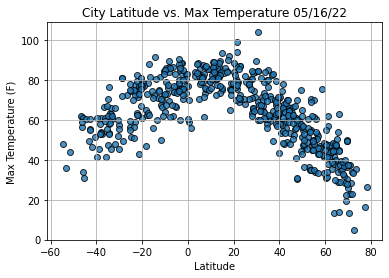

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


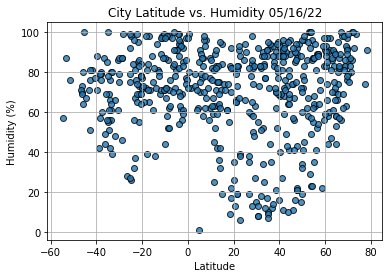

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

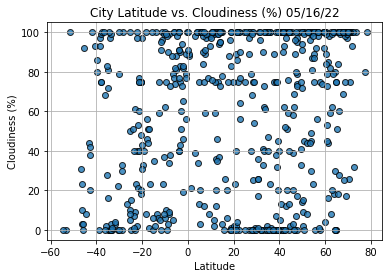

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

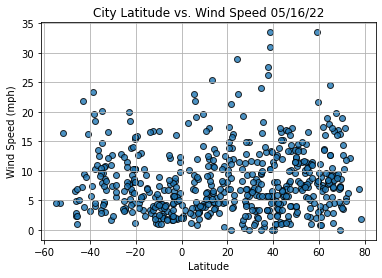

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [32]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2022-05-16 04:10:50
Lat                       71.2906
Lng                     -156.7887
Max Temp                    28.42
Humidity                       80
Cloudiness                    100
Wind Speed                  17.27
Name: 13, dtype: object

In [33]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
552     True
553    False
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2022-05-16 04:07:15,63.7506,-68.5145,13.15,90,100,2.84
1,Kralendijk,BQ,2022-05-16 04:07:04,12.1500,-68.2667,80.58,83,20,17.27
2,Albany,US,2022-05-16 04:06:15,42.6001,-73.9662,65.64,94,100,3.27
4,Sovetskiy,RU,2022-05-16 04:10:47,61.3614,63.5842,56.73,58,16,7.56
7,Atakpame,TG,2022-05-16 04:10:48,7.5333,1.1333,73.27,93,89,2.98


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

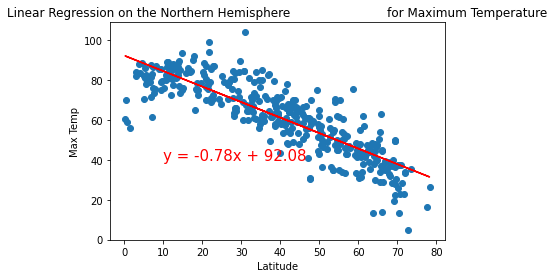

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

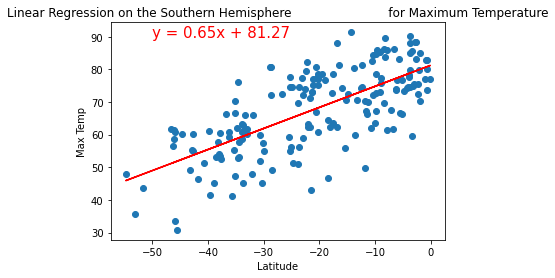

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

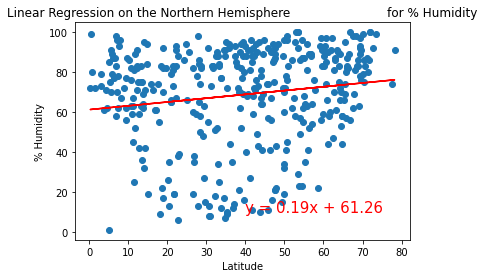

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

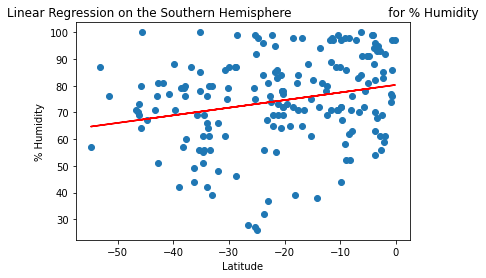

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

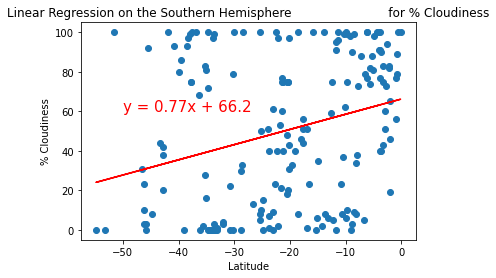

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

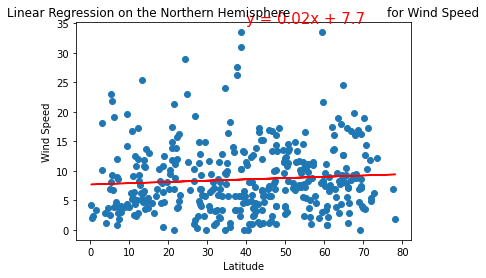

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

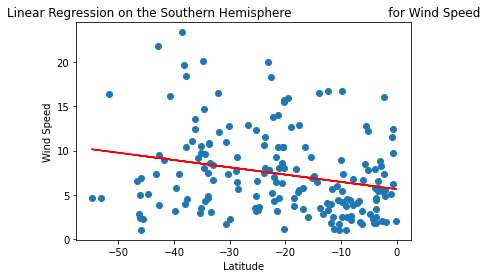

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [53]:
conda install -c conda-forge gmaps

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/bigv/opt/anaconda3

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py39h6e9494a_0         1.0 MB  conda-forge
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geojs

In [54]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.
